In [1]:
import os
import sys
from collections import OrderedDict

In [2]:
sys.path.append("../..")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import spatialpy
spatialpy.__file__

'../../spatialpy/__init__.py'

In [5]:
import matplotlib.pyplot as plt
import numpy

# Global Constants
MAX_X_DIM = 5.0
MIN_X_DIM = -5.0
TOL = 1e-9

In [6]:
class Edge1(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MAX_X_DIM) < 0.05
class Edge2(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return abs(x[0] - MIN_X_DIM) < 0.05


In [7]:
class cylinderDemo3D(spatialpy.Model):
    def __init__(self, model_name="cylinder_demo3d"):
        spatialpy.Model.__init__(self, model_name)

        # System constants
        D_const = 0.1

        # Define Species
        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        B = spatialpy.Species(name="B", diffusion_constant=D_const)
        self.add_species([A, B])

        # Define Geometry
        self.mesh = spatialpy.Mesh.read_xml_mesh('cylinder.xml')

        # Define Subdomains
        self.add_subdomain(Edge1(), 2)
        self.add_subdomain(Edge2(), 3)
        
        # Restrict the movement of Chemical Species
        self.restrict(A,[1,2])
        self.restrict(B,[1,3])

        vol = self.mesh.get_vol()
        print("vol",vol)
        sd = self.mesh.sd
        left = numpy.sum(vol[sd == 2])
        right = numpy.sum(vol[sd == 3])
        print("left "+str(left)+" right "+str(right))
        
        k_react = spatialpy.Parameter(name="k_react", expression=1.0)
        k_creat1 = spatialpy.Parameter(name="k_creat1", 
                                     expression=100/left)
        k_creat2 = spatialpy.Parameter(name="k_creat2", 
                                     expression=100/right)
        self.add_parameter([k_react, k_creat1,k_creat2])


        # Define Reactions
        R1 = spatialpy.Reaction(reactants=None, products={A:1}, 
                                rate=k_creat1, restrict_to=2)
        R2 = spatialpy.Reaction(reactants=None, products={B:1}, 
                              rate=k_creat2, restrict_to=3)
        R3 = spatialpy.Reaction(reactants={A:1, B:1}, products=None, 
                              rate=k_react)
        self.add_reaction([R1, R2, R3])

        # Define simulation timespan
        #self.set_timesteps(1, 200)
        self.timespan(range(500))

In [8]:
model = cylinderDemo3D()

vol [0.01513526 0.07034112 0.02382667 ... 0.01674217 0.02120607 0.01969156]
left 0.5092013833059308 right 0.505804729089437


In [9]:
model.listOfReactions

OrderedDict([('rxn6ee5c646_68e9_4aa5_875d_197382d0374e',
              <spatialpy.Model.Reaction at 0x7fdb4e726b20>),
             ('rxnce8a291d_38d9_4aba_aea7_e60b7fd433a9',
              <spatialpy.Model.Reaction at 0x7fdb4e726520>),
             ('rxnddbb152e_fc47_447a_b7cb_efe45b78ecbe',
              <spatialpy.Model.Reaction at 0x7fdb4e726220>)])

In [10]:
from spatialpy.nsmsolver import NSMSolver

In [11]:
#result = model.run(report_level=2)
sol = NSMSolver(model, report_level=2)
sol.h = 0.8
print("h="+str(sol.h))
%time sol.compile()

h=0.8
Compiling Solver.  Build dir: /tmp/spatialpy_build_571s17zs
Creating propensity file /tmp/spatialpy_build_571s17zs/cylinder_demo3d_generated_model.c
cmd: cd /tmp/spatialpy_build_571s17zs ; make -f /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/build/Makefile.nsm ROOT=/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine MODEL=/tmp/spatialpy_build_571s17zs/cylinder_demo3d_generated_model.c BUILD=/tmp/spatialpy_build_571s17zs

gcc -c -o linked_list.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/linked_list.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o particle.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/src/particle.c -I/home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sdpd-c-simulation-engine/include/ -O3 -Wall 
gcc -c -o simulate.o /home/brian/Desktop/research/SpatialPy/spatialpy/ssa_sd

In [12]:
%time result = sol.run()

cmd: cd /tmp/spatialpy_result_gcrkyq0e;/tmp/spatialpy_build_571s17zs/ssa_sdpd

Elapsed seconds: 2.36

CPU times: user 3.18 ms, sys: 3.24 ms, total: 6.43 ms
Wall time: 2.36 s


read_step(0) opening '/tmp/spatialpy_result_gcrkyq0e/output0.vtk'
read_step(1) opening '/tmp/spatialpy_result_gcrkyq0e/output1.vtk'
read_step(2) opening '/tmp/spatialpy_result_gcrkyq0e/output2.vtk'
read_step(3) opening '/tmp/spatialpy_result_gcrkyq0e/output3.vtk'
read_step(4) opening '/tmp/spatialpy_result_gcrkyq0e/output4.vtk'
read_step(5) opening '/tmp/spatialpy_result_gcrkyq0e/output5.vtk'
read_step(6) opening '/tmp/spatialpy_result_gcrkyq0e/output6.vtk'
read_step(7) opening '/tmp/spatialpy_result_gcrkyq0e/output7.vtk'
read_step(8) opening '/tmp/spatialpy_result_gcrkyq0e/output8.vtk'
read_step(9) opening '/tmp/spatialpy_result_gcrkyq0e/output9.vtk'
read_step(10) opening '/tmp/spatialpy_result_gcrkyq0e/output10.vtk'
read_step(11) opening '/tmp/spatialpy_result_gcrkyq0e/output11.vtk'
read_step(12) opening '/tmp/spatialpy_result_gcrkyq0e/output12.vtk'
read_step(13) opening '/tmp/spatialpy_result_gcrkyq0e/output13.vtk'
read_step(14) opening '/tmp/spatialpy_result_gcrkyq0e/output14.vtk'


read_step(163) opening '/tmp/spatialpy_result_gcrkyq0e/output163.vtk'
read_step(164) opening '/tmp/spatialpy_result_gcrkyq0e/output164.vtk'
read_step(165) opening '/tmp/spatialpy_result_gcrkyq0e/output165.vtk'
read_step(166) opening '/tmp/spatialpy_result_gcrkyq0e/output166.vtk'
read_step(167) opening '/tmp/spatialpy_result_gcrkyq0e/output167.vtk'
read_step(168) opening '/tmp/spatialpy_result_gcrkyq0e/output168.vtk'
read_step(169) opening '/tmp/spatialpy_result_gcrkyq0e/output169.vtk'
read_step(170) opening '/tmp/spatialpy_result_gcrkyq0e/output170.vtk'
read_step(171) opening '/tmp/spatialpy_result_gcrkyq0e/output171.vtk'
read_step(172) opening '/tmp/spatialpy_result_gcrkyq0e/output172.vtk'
read_step(173) opening '/tmp/spatialpy_result_gcrkyq0e/output173.vtk'
read_step(174) opening '/tmp/spatialpy_result_gcrkyq0e/output174.vtk'
read_step(175) opening '/tmp/spatialpy_result_gcrkyq0e/output175.vtk'
read_step(176) opening '/tmp/spatialpy_result_gcrkyq0e/output176.vtk'
read_step(177) openi

read_step(283) opening '/tmp/spatialpy_result_gcrkyq0e/output283.vtk'
read_step(284) opening '/tmp/spatialpy_result_gcrkyq0e/output284.vtk'
read_step(285) opening '/tmp/spatialpy_result_gcrkyq0e/output285.vtk'
read_step(286) opening '/tmp/spatialpy_result_gcrkyq0e/output286.vtk'
read_step(287) opening '/tmp/spatialpy_result_gcrkyq0e/output287.vtk'
read_step(288) opening '/tmp/spatialpy_result_gcrkyq0e/output288.vtk'
read_step(289) opening '/tmp/spatialpy_result_gcrkyq0e/output289.vtk'
read_step(290) opening '/tmp/spatialpy_result_gcrkyq0e/output290.vtk'
read_step(291) opening '/tmp/spatialpy_result_gcrkyq0e/output291.vtk'
read_step(292) opening '/tmp/spatialpy_result_gcrkyq0e/output292.vtk'
read_step(293) opening '/tmp/spatialpy_result_gcrkyq0e/output293.vtk'
read_step(294) opening '/tmp/spatialpy_result_gcrkyq0e/output294.vtk'
read_step(295) opening '/tmp/spatialpy_result_gcrkyq0e/output295.vtk'
read_step(296) opening '/tmp/spatialpy_result_gcrkyq0e/output296.vtk'
read_step(297) openi

read_step(448) opening '/tmp/spatialpy_result_gcrkyq0e/output448.vtk'
read_step(449) opening '/tmp/spatialpy_result_gcrkyq0e/output449.vtk'
read_step(450) opening '/tmp/spatialpy_result_gcrkyq0e/output450.vtk'
read_step(451) opening '/tmp/spatialpy_result_gcrkyq0e/output451.vtk'
read_step(452) opening '/tmp/spatialpy_result_gcrkyq0e/output452.vtk'
read_step(453) opening '/tmp/spatialpy_result_gcrkyq0e/output453.vtk'
read_step(454) opening '/tmp/spatialpy_result_gcrkyq0e/output454.vtk'
read_step(455) opening '/tmp/spatialpy_result_gcrkyq0e/output455.vtk'
read_step(456) opening '/tmp/spatialpy_result_gcrkyq0e/output456.vtk'
read_step(457) opening '/tmp/spatialpy_result_gcrkyq0e/output457.vtk'
read_step(458) opening '/tmp/spatialpy_result_gcrkyq0e/output458.vtk'
read_step(459) opening '/tmp/spatialpy_result_gcrkyq0e/output459.vtk'
read_step(460) opening '/tmp/spatialpy_result_gcrkyq0e/output460.vtk'
read_step(461) opening '/tmp/spatialpy_result_gcrkyq0e/output461.vtk'
read_step(462) openi

read_step(68) opening '/tmp/spatialpy_result_gcrkyq0e/output68.vtk'
read_step(69) opening '/tmp/spatialpy_result_gcrkyq0e/output69.vtk'
read_step(70) opening '/tmp/spatialpy_result_gcrkyq0e/output70.vtk'
read_step(71) opening '/tmp/spatialpy_result_gcrkyq0e/output71.vtk'
read_step(72) opening '/tmp/spatialpy_result_gcrkyq0e/output72.vtk'
read_step(73) opening '/tmp/spatialpy_result_gcrkyq0e/output73.vtk'
read_step(74) opening '/tmp/spatialpy_result_gcrkyq0e/output74.vtk'
read_step(75) opening '/tmp/spatialpy_result_gcrkyq0e/output75.vtk'
read_step(76) opening '/tmp/spatialpy_result_gcrkyq0e/output76.vtk'
read_step(77) opening '/tmp/spatialpy_result_gcrkyq0e/output77.vtk'
read_step(78) opening '/tmp/spatialpy_result_gcrkyq0e/output78.vtk'
read_step(79) opening '/tmp/spatialpy_result_gcrkyq0e/output79.vtk'
read_step(80) opening '/tmp/spatialpy_result_gcrkyq0e/output80.vtk'
read_step(81) opening '/tmp/spatialpy_result_gcrkyq0e/output81.vtk'
read_step(82) opening '/tmp/spatialpy_result_gcr

read_step(199) opening '/tmp/spatialpy_result_gcrkyq0e/output199.vtk'
read_step(200) opening '/tmp/spatialpy_result_gcrkyq0e/output200.vtk'
read_step(201) opening '/tmp/spatialpy_result_gcrkyq0e/output201.vtk'
read_step(202) opening '/tmp/spatialpy_result_gcrkyq0e/output202.vtk'
read_step(203) opening '/tmp/spatialpy_result_gcrkyq0e/output203.vtk'
read_step(204) opening '/tmp/spatialpy_result_gcrkyq0e/output204.vtk'
read_step(205) opening '/tmp/spatialpy_result_gcrkyq0e/output205.vtk'
read_step(206) opening '/tmp/spatialpy_result_gcrkyq0e/output206.vtk'
read_step(207) opening '/tmp/spatialpy_result_gcrkyq0e/output207.vtk'
read_step(208) opening '/tmp/spatialpy_result_gcrkyq0e/output208.vtk'
read_step(209) opening '/tmp/spatialpy_result_gcrkyq0e/output209.vtk'
read_step(210) opening '/tmp/spatialpy_result_gcrkyq0e/output210.vtk'
read_step(211) opening '/tmp/spatialpy_result_gcrkyq0e/output211.vtk'
read_step(212) opening '/tmp/spatialpy_result_gcrkyq0e/output212.vtk'
read_step(213) openi

read_step(342) opening '/tmp/spatialpy_result_gcrkyq0e/output342.vtk'
read_step(343) opening '/tmp/spatialpy_result_gcrkyq0e/output343.vtk'
read_step(344) opening '/tmp/spatialpy_result_gcrkyq0e/output344.vtk'
read_step(345) opening '/tmp/spatialpy_result_gcrkyq0e/output345.vtk'
read_step(346) opening '/tmp/spatialpy_result_gcrkyq0e/output346.vtk'
read_step(347) opening '/tmp/spatialpy_result_gcrkyq0e/output347.vtk'
read_step(348) opening '/tmp/spatialpy_result_gcrkyq0e/output348.vtk'
read_step(349) opening '/tmp/spatialpy_result_gcrkyq0e/output349.vtk'
read_step(350) opening '/tmp/spatialpy_result_gcrkyq0e/output350.vtk'
read_step(351) opening '/tmp/spatialpy_result_gcrkyq0e/output351.vtk'
read_step(352) opening '/tmp/spatialpy_result_gcrkyq0e/output352.vtk'
read_step(353) opening '/tmp/spatialpy_result_gcrkyq0e/output353.vtk'
read_step(354) opening '/tmp/spatialpy_result_gcrkyq0e/output354.vtk'
read_step(355) opening '/tmp/spatialpy_result_gcrkyq0e/output355.vtk'
read_step(356) openi

read_step(474) opening '/tmp/spatialpy_result_gcrkyq0e/output474.vtk'
read_step(475) opening '/tmp/spatialpy_result_gcrkyq0e/output475.vtk'
read_step(476) opening '/tmp/spatialpy_result_gcrkyq0e/output476.vtk'
read_step(477) opening '/tmp/spatialpy_result_gcrkyq0e/output477.vtk'
read_step(478) opening '/tmp/spatialpy_result_gcrkyq0e/output478.vtk'
read_step(479) opening '/tmp/spatialpy_result_gcrkyq0e/output479.vtk'
read_step(480) opening '/tmp/spatialpy_result_gcrkyq0e/output480.vtk'
read_step(481) opening '/tmp/spatialpy_result_gcrkyq0e/output481.vtk'
read_step(482) opening '/tmp/spatialpy_result_gcrkyq0e/output482.vtk'
read_step(483) opening '/tmp/spatialpy_result_gcrkyq0e/output483.vtk'
read_step(484) opening '/tmp/spatialpy_result_gcrkyq0e/output484.vtk'
read_step(485) opening '/tmp/spatialpy_result_gcrkyq0e/output485.vtk'
read_step(486) opening '/tmp/spatialpy_result_gcrkyq0e/output486.vtk'
read_step(487) opening '/tmp/spatialpy_result_gcrkyq0e/output487.vtk'
read_step(488) openi

read_step(133) opening '/tmp/spatialpy_result_gcrkyq0e/output133.vtk'
read_step(134) opening '/tmp/spatialpy_result_gcrkyq0e/output134.vtk'
read_step(135) opening '/tmp/spatialpy_result_gcrkyq0e/output135.vtk'
read_step(136) opening '/tmp/spatialpy_result_gcrkyq0e/output136.vtk'
read_step(137) opening '/tmp/spatialpy_result_gcrkyq0e/output137.vtk'
read_step(138) opening '/tmp/spatialpy_result_gcrkyq0e/output138.vtk'
read_step(139) opening '/tmp/spatialpy_result_gcrkyq0e/output139.vtk'
read_step(140) opening '/tmp/spatialpy_result_gcrkyq0e/output140.vtk'
read_step(141) opening '/tmp/spatialpy_result_gcrkyq0e/output141.vtk'
read_step(142) opening '/tmp/spatialpy_result_gcrkyq0e/output142.vtk'
read_step(143) opening '/tmp/spatialpy_result_gcrkyq0e/output143.vtk'
read_step(144) opening '/tmp/spatialpy_result_gcrkyq0e/output144.vtk'
read_step(145) opening '/tmp/spatialpy_result_gcrkyq0e/output145.vtk'
read_step(146) opening '/tmp/spatialpy_result_gcrkyq0e/output146.vtk'
read_step(147) openi

read_step(308) opening '/tmp/spatialpy_result_gcrkyq0e/output308.vtk'
read_step(309) opening '/tmp/spatialpy_result_gcrkyq0e/output309.vtk'
read_step(310) opening '/tmp/spatialpy_result_gcrkyq0e/output310.vtk'
read_step(311) opening '/tmp/spatialpy_result_gcrkyq0e/output311.vtk'
read_step(312) opening '/tmp/spatialpy_result_gcrkyq0e/output312.vtk'
read_step(313) opening '/tmp/spatialpy_result_gcrkyq0e/output313.vtk'
read_step(314) opening '/tmp/spatialpy_result_gcrkyq0e/output314.vtk'
read_step(315) opening '/tmp/spatialpy_result_gcrkyq0e/output315.vtk'
read_step(316) opening '/tmp/spatialpy_result_gcrkyq0e/output316.vtk'
read_step(317) opening '/tmp/spatialpy_result_gcrkyq0e/output317.vtk'
read_step(318) opening '/tmp/spatialpy_result_gcrkyq0e/output318.vtk'
read_step(319) opening '/tmp/spatialpy_result_gcrkyq0e/output319.vtk'
read_step(320) opening '/tmp/spatialpy_result_gcrkyq0e/output320.vtk'
read_step(321) opening '/tmp/spatialpy_result_gcrkyq0e/output321.vtk'
read_step(322) openi

read_step(454) opening '/tmp/spatialpy_result_gcrkyq0e/output454.vtk'
read_step(455) opening '/tmp/spatialpy_result_gcrkyq0e/output455.vtk'
read_step(456) opening '/tmp/spatialpy_result_gcrkyq0e/output456.vtk'
read_step(457) opening '/tmp/spatialpy_result_gcrkyq0e/output457.vtk'
read_step(458) opening '/tmp/spatialpy_result_gcrkyq0e/output458.vtk'
read_step(459) opening '/tmp/spatialpy_result_gcrkyq0e/output459.vtk'
read_step(460) opening '/tmp/spatialpy_result_gcrkyq0e/output460.vtk'
read_step(461) opening '/tmp/spatialpy_result_gcrkyq0e/output461.vtk'
read_step(462) opening '/tmp/spatialpy_result_gcrkyq0e/output462.vtk'
read_step(463) opening '/tmp/spatialpy_result_gcrkyq0e/output463.vtk'
read_step(464) opening '/tmp/spatialpy_result_gcrkyq0e/output464.vtk'
read_step(465) opening '/tmp/spatialpy_result_gcrkyq0e/output465.vtk'
read_step(466) opening '/tmp/spatialpy_result_gcrkyq0e/output466.vtk'
read_step(467) opening '/tmp/spatialpy_result_gcrkyq0e/output467.vtk'
read_step(468) openi

read_step(79) opening '/tmp/spatialpy_result_gcrkyq0e/output79.vtk'
read_step(80) opening '/tmp/spatialpy_result_gcrkyq0e/output80.vtk'
read_step(81) opening '/tmp/spatialpy_result_gcrkyq0e/output81.vtk'
read_step(82) opening '/tmp/spatialpy_result_gcrkyq0e/output82.vtk'
read_step(83) opening '/tmp/spatialpy_result_gcrkyq0e/output83.vtk'
read_step(84) opening '/tmp/spatialpy_result_gcrkyq0e/output84.vtk'
read_step(85) opening '/tmp/spatialpy_result_gcrkyq0e/output85.vtk'
read_step(86) opening '/tmp/spatialpy_result_gcrkyq0e/output86.vtk'
read_step(87) opening '/tmp/spatialpy_result_gcrkyq0e/output87.vtk'
read_step(88) opening '/tmp/spatialpy_result_gcrkyq0e/output88.vtk'
read_step(89) opening '/tmp/spatialpy_result_gcrkyq0e/output89.vtk'
read_step(90) opening '/tmp/spatialpy_result_gcrkyq0e/output90.vtk'
read_step(91) opening '/tmp/spatialpy_result_gcrkyq0e/output91.vtk'
read_step(92) opening '/tmp/spatialpy_result_gcrkyq0e/output92.vtk'
read_step(93) opening '/tmp/spatialpy_result_gcr

read_step(227) opening '/tmp/spatialpy_result_gcrkyq0e/output227.vtk'
read_step(228) opening '/tmp/spatialpy_result_gcrkyq0e/output228.vtk'
read_step(229) opening '/tmp/spatialpy_result_gcrkyq0e/output229.vtk'
read_step(230) opening '/tmp/spatialpy_result_gcrkyq0e/output230.vtk'
read_step(231) opening '/tmp/spatialpy_result_gcrkyq0e/output231.vtk'
read_step(232) opening '/tmp/spatialpy_result_gcrkyq0e/output232.vtk'
read_step(233) opening '/tmp/spatialpy_result_gcrkyq0e/output233.vtk'
read_step(234) opening '/tmp/spatialpy_result_gcrkyq0e/output234.vtk'
read_step(235) opening '/tmp/spatialpy_result_gcrkyq0e/output235.vtk'
read_step(236) opening '/tmp/spatialpy_result_gcrkyq0e/output236.vtk'
read_step(237) opening '/tmp/spatialpy_result_gcrkyq0e/output237.vtk'
read_step(238) opening '/tmp/spatialpy_result_gcrkyq0e/output238.vtk'
read_step(239) opening '/tmp/spatialpy_result_gcrkyq0e/output239.vtk'
read_step(240) opening '/tmp/spatialpy_result_gcrkyq0e/output240.vtk'
read_step(241) openi

read_step(354) opening '/tmp/spatialpy_result_gcrkyq0e/output354.vtk'
read_step(355) opening '/tmp/spatialpy_result_gcrkyq0e/output355.vtk'
read_step(356) opening '/tmp/spatialpy_result_gcrkyq0e/output356.vtk'
read_step(357) opening '/tmp/spatialpy_result_gcrkyq0e/output357.vtk'
read_step(358) opening '/tmp/spatialpy_result_gcrkyq0e/output358.vtk'
read_step(359) opening '/tmp/spatialpy_result_gcrkyq0e/output359.vtk'
read_step(360) opening '/tmp/spatialpy_result_gcrkyq0e/output360.vtk'
read_step(361) opening '/tmp/spatialpy_result_gcrkyq0e/output361.vtk'
read_step(362) opening '/tmp/spatialpy_result_gcrkyq0e/output362.vtk'
read_step(363) opening '/tmp/spatialpy_result_gcrkyq0e/output363.vtk'
read_step(364) opening '/tmp/spatialpy_result_gcrkyq0e/output364.vtk'
read_step(365) opening '/tmp/spatialpy_result_gcrkyq0e/output365.vtk'
read_step(366) opening '/tmp/spatialpy_result_gcrkyq0e/output366.vtk'
read_step(367) opening '/tmp/spatialpy_result_gcrkyq0e/output367.vtk'
read_step(368) openi

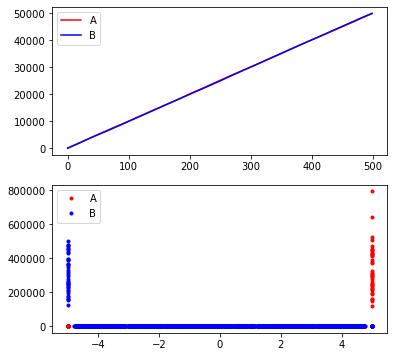

In [13]:
# Plot of the time-average spatial concentration.
x_vals = model.mesh.coordinates()[:, 0]
A_vals = numpy.sum(result.get_species("A", concentration=False), axis=0)
B_vals = numpy.sum(result.get_species("B", concentration=False), axis=0)

A_sum = numpy.sum(result.get_species("A"), axis=1)
B_sum = numpy.sum(result.get_species("B"), axis=1)
print(A_sum[-1])
print(B_sum[-1])
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(result.get_timespan(),A_sum,'-r',label="A")
plt.plot(result.get_timespan(),B_sum,'-b',label="B")
plt.legend(loc='best')
plt.subplot(2,1,2)

vol = model.mesh.vol
sd = model.mesh.sd
print(numpy.sum(vol[sd == 2]))
print(numpy.sum(vol[sd == 3]))


plt.plot(x_vals,A_vals,'.r',x_vals,B_vals,'.b')
plt.legend(['A', 'B'],loc='best')
